In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
freq = np.linspace(0.35, 0.48, 14)
amp = np.array([4.3,4.8,5.6,6.4,7.7,9.3, 11.1, 12.5, 12.1, 10.3, 8.7, 7.3, 6.2, 5.4])

In [3]:
def Lorentzian(xval, center, gamma, A):
    return (A/np.pi) * (gamma / (np.sqrt((xval - center)**2 + (gamma)**2)))

The Lorentzian has a maximum at $x = x_0$, with a value of $L(x_0) = \frac{2}{\pi \Gamma}$

In [4]:
popt, pcov = scipy.optimize.curve_fit(Lorentzian, freq, amp)

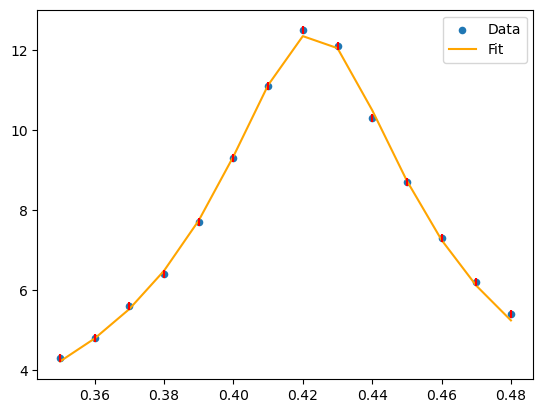

In [5]:
plt.scatter(freq, amp, s = 30, linewidth = 0)
plt.plot(freq, Lorentzian(freq, *popt),c = 'orange')
plt.errorbar(freq, amp, yerr = 0.1, fmt = 'none',c = 'r')
plt.legend(labels = ['Data', 'Fit'])
plt.title('')
plt.show()

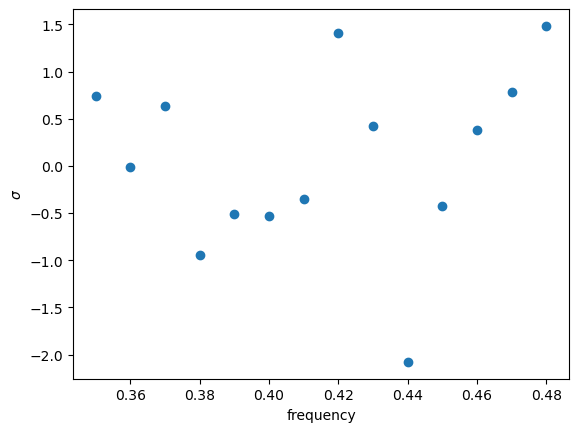

In [6]:
residual = (amp - Lorentzian(freq, *popt)) / 0.1

plt.scatter(freq, residual)
plt.ylabel(r'$\sigma$')
plt.xlabel('frequency')
plt.show()

In [7]:
#errors
perr = np.sqrt(np.diag(pcov))
perr

array([0.00022786, 0.00031124, 0.21187172])

In [8]:
print('x0 = ' + str(round(popt[0],2)) + ' +- ' + str(round(perr[0],4)))
print('Gamma = ' + str(round(popt[1],2)) + ' +- ' + str(round(perr[1],4)))
print('A (constant) = ' + str(round(popt[2],2)) + ' +- ' + str(round(perr[2],4)))

x0 = 0.42 +- 0.0002
Gamma = -0.03 +- 0.0003
A (constant) = -39.11 +- 0.2119


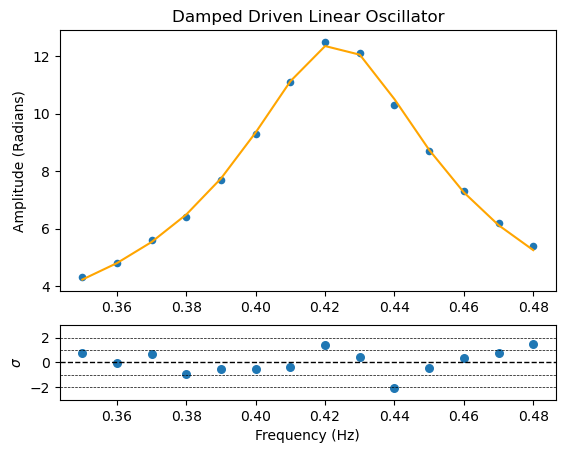

In [21]:
fig, axs = plt.subplots(2, gridspec_kw={'height_ratios': [3.5, 1]})
# fig.suptitle('Damped Driven Linear Oscillator')
axs[0].scatter(freq, amp, s = 30, linewidth = 0)
axs[0].plot(freq, Lorentzian(freq, *popt),c = 'orange')
axs[1].scatter(freq, residual, s = 30)

#center second plot at 0
axs[1].set_ylim(-3, 3)

#labels
axs[0].set_title('Damped Driven Linear Oscillator')

axs[0].set_ylabel('Amplitude (Radians)')

axs[1].set_ylabel(r'$\sigma$')
axs[1].set_xlabel('Frequency (Hz)')


axs[1].axhline(0, c = 'k', linestyle = '--', linewidth = 1)

axs[1].axhline(1, c = 'k', linestyle = '--', linewidth = 0.5)
axs[1].axhline(-1, c = 'k', linestyle = '--', linewidth = 0.5)
axs[1].axhline(2, c = 'k', linestyle = '--', linewidth = 0.5)
axs[1].axhline(-2, c = 'k', linestyle = '--', linewidth = 0.5)

axs[1].set_yticks([-2,0,2])

plt.savefig('Resonance Fit.png')

plt.show()